In [1]:
# This code snippet would help to access module of upper directory

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from read_utils import load_one_param_file

In [3]:
from utils import DATA_DIR, FIRST_EXPERIMENT_CLASSES,\
    SESSION_NAME, SESSION_OBJECTS, SESSION_EVENTS, GLYPH_BOX, NORMAL, \
    START, END, LABEL

In [4]:
session_data = load_one_param_file(os.path.join( DATA_DIR, 'SlideAround', 'Session1', 'files.param'))

'NoneType' object has no attribute 'findall'


In [5]:
import numpy as np

np.cross([0,0,1], [1,0,0])

array([0, 1, 0])

In [6]:
%matplotlib inline

from feature.project_table import project_markers, estimate_cube_2d
from simulator.utils import Cube2D, Transform2D
from matplotlib import pyplot as plt

def count_finite( numpy_array ):
    return np.sum( np.isfinite( numpy_array )) 

'''
Area of polygons
===========
Params: numpy_array of size ( 3 x n )

Return: object_data: Dictionary
'''
def area_dimension( numpy_array ):
    s = np.reshape(numpy_array, (len(numpy_array)//3,3))
    x = s[:,0]
    y = s[:,1]
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))

def project_to2d_ ( session_data ):
    object_data = {}

    for object_name in session_data[SESSION_OBJECTS]:
        if object_name == 'table':
            polygon = []
            for frameNo in session_data[SESSION_OBJECTS][object_name]:
                frame_polygon = session_data[SESSION_OBJECTS][object_name][frameNo]

            polygon.append(frame_polygon)

            polygon = np.concatenate(polygon)
            polygon = np.reshape(polygon, (len(polygon)//3, 3) )
            
            table_markers = polygon

            # Just pick the first two points for coordination
            first_point = table_markers[0]
            second_point = table_markers[1]
    
    for object_name in session_data[SESSION_OBJECTS]:
        if object_name != 'table':
            object_data[object_name] = {}
            for frameNo in session_data[SESSION_OBJECTS][object_name]:
                frame_data = session_data[SESSION_OBJECTS][object_name][frameNo]

                # Sort firstly by number of non-finite corners
                # Sort secondly by size of marker (larger marker means better resolution)
                # Size of marker should be only based on first two dimensions
                # The third dimension might be very noisy
                q = [((count_finite(frame_data[face_index]), area_dimension(frame_data[face_index]) ), face_index) 
                    for face_index in frame_data]
                q = sorted(q, key = lambda t: t[0], reverse = True)

                # Pick out the face_index with the most number of non-infinite values
                best_face_index = q[0][1]
                #print ('-----------')
                #print (frame_data[best_face_index])
                rectangle_projected = project_markers ( frame_data[best_face_index], table_markers )
                #print (rectangle_projected)
                object_data[object_name][frameNo] = estimate_cube_2d ( rectangle_projected, first_point, second_point )

    return object_data

def make_lines(shape):
    lines = []
    for i in range(len(shape)):
        j = (i + 1) % len(shape)
        lines.append( [ shape[i], shape[j] ] )
    
    return lines

colors = {'Shell': (1, 0, 0, 1), "Stella Artois" : (0,1,0,1) }

'''
Demo the movement of objects in a session from from_frame to to_frame (inclusive)
'''
#print (2)

object_data = project_to2d_(session_data)

2
-----------
[-0.38121289 -0.28541371  1.28100002 -0.3835206  -0.2064252   1.26499999
 -0.30693999 -0.2189651   1.21899998 -0.30063951 -0.30213389  1.23500001]
filtered_points
[array([-0.70389062, -0.23684651,  1.50199997], dtype=float32), array([-0.24000441, -0.0554968 ,  2.01300001], dtype=float32), array([ 0.67664671, -0.3363612 ,  1.23000002], dtype=float32), array([ 0.1116755 , -0.42476559,  0.97200012], dtype=float32)]
filtered_points
[array([-0.38121289, -0.28541371,  1.28100002], dtype=float32), array([-0.3835206 , -0.2064252 ,  1.26499999], dtype=float32), array([-0.30693999, -0.2189651 ,  1.21899998], dtype=float32), array([-0.30063951, -0.30213389,  1.23500001], dtype=float32)]
[array([-0.17260042, -0.28322061,  1.3723523 ]), array([-0.26660954, -0.33397027,  1.22850836]), array([-0.4198438 , -0.30211845,  1.31741685]), array([-0.32583469, -0.25136879,  1.4612608 ])]
filtered_points
[array([-0.17260042, -0.28322061,  1.3723523 ]), array([-0.26660954, -0.33397027,  1.2285083

[array([-0.17173553, -0.28387078,  1.37052284]), array([-0.26722488, -0.33417059,  1.22793898]), array([-0.41941369, -0.30176129,  1.31842767]), array([-0.32392434, -0.25146148,  1.46101154])]
-----------
[-0.38091531 -0.28519091  1.27999997 -0.38382381 -0.2065883   1.26600003
 -0.30719179 -0.2191447   1.22000003 -0.30063951 -0.30213389  1.23500001]
filtered_points
[array([-0.70389062, -0.23684651,  1.50199997], dtype=float32), array([-0.24000441, -0.0554968 ,  2.01300001], dtype=float32), array([ 0.67664671, -0.3363612 ,  1.23000002], dtype=float32), array([ 0.1116755 , -0.42476559,  0.97200012], dtype=float32)]
filtered_points
[array([-0.38091531, -0.28519091,  1.27999997], dtype=float32), array([-0.38382381, -0.2065883 ,  1.26600003], dtype=float32), array([-0.30719179, -0.2191447 ,  1.22000003], dtype=float32), array([-0.30063951, -0.30213389,  1.23500001], dtype=float32)]
[array([-0.17314202, -0.28301355,  1.3729332 ]), array([-0.26651282, -0.33380764,  1.22896799]), array([-0.420

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in float_scalars


filtered_points
[array([-0.17227407, -0.28365377,  1.37113186]), array([-0.26676608, -0.33415296,  1.22799171]), array([-0.41957463, -0.30207248,  1.31754834]), array([-0.32508262, -0.25157329,  1.46068849])]
-----------
[-0.38121289 -0.28541371  1.28100002 -0.3835206  -0.2064252   1.26499999
 -0.30744359 -0.2193244   1.22099996 -0.29990929 -0.30140001  1.23199999]
filtered_points
[array([-0.70389062, -0.23684651,  1.50199997], dtype=float32), array([-0.24000441, -0.0554968 ,  2.01300001], dtype=float32), array([ 0.67664671, -0.3363612 ,  1.23000002], dtype=float32), array([ 0.1116755 , -0.42476559,  0.97200012], dtype=float32)]
filtered_points
[array([-0.38121289, -0.28541371,  1.28100002], dtype=float32), array([-0.3835206 , -0.2064252 ,  1.26499999], dtype=float32), array([-0.30744359, -0.2193244 ,  1.22099996], dtype=float32), array([-0.29990929, -0.30140001,  1.23199999], dtype=float32)]
[array([-0.17227407, -0.28365377,  1.37113186]), array([-0.26676608, -0.33415296,  1.22799171]

[array([-0.70389062, -0.23684651,  1.50199997], dtype=float32), array([-0.24000441, -0.0554968 ,  2.01300001], dtype=float32), array([ 0.67664671, -0.3363612 ,  1.23000002], dtype=float32), array([ 0.1116755 , -0.42476559,  0.97200012], dtype=float32)]
filtered_points
[array([-0.38240331, -0.28630489,  1.28499997], dtype=float32), array([-0.38443011, -0.20691469,  1.26800001], dtype=float32), array([-0.3076953, -0.219504 ,  1.222    ], dtype=float32), array([-0.30112651, -0.30262321,  1.23699999], dtype=float32)]
[array([-0.17276899, -0.28270324,  1.37381143]), array([-0.26774169, -0.33325218,  1.23052779]), array([-0.42037594, -0.30107873,  1.32034792]), array([-0.32540324, -0.2505298 ,  1.46363155])]
filtered_points
[array([-0.17276899, -0.28270324,  1.37381143]), array([-0.26774169, -0.33325218,  1.23052779]), array([-0.42037594, -0.30107873,  1.32034792]), array([-0.32540324, -0.2505298 ,  1.46363155])]
-----------
[-0.38210571 -0.28608209  1.28400004 -0.3841269  -0.2067515   1.266

-----------
[-0.3815105  -0.28563651  1.28199995 -0.3835206  -0.2064252   1.26499999
 -0.30744359 -0.2193244   1.22099996 -0.30063951 -0.30213389  1.23500001]
filtered_points
[array([-0.70389062, -0.23684651,  1.50199997], dtype=float32), array([-0.24000441, -0.0554968 ,  2.01300001], dtype=float32), array([ 0.67664671, -0.3363612 ,  1.23000002], dtype=float32), array([ 0.1116755 , -0.42476559,  0.97200012], dtype=float32)]
filtered_points
[array([-0.3815105 , -0.28563651,  1.28199995], dtype=float32), array([-0.3835206 , -0.2064252 ,  1.26499999], dtype=float32), array([-0.30744359, -0.2193244 ,  1.22099996], dtype=float32), array([-0.30063951, -0.30213389,  1.23500001], dtype=float32)]
[array([-0.17321191, -0.28282683,  1.37345976]), array([-0.26664558, -0.33366146,  1.22937972]), array([-0.42020668, -0.30198676,  1.31778619]), array([-0.326773  , -0.25115213,  1.46186623])]
filtered_points
[array([-0.17321191, -0.28282683,  1.37345976]), array([-0.26664558, -0.33366146,  1.22937972]

D:\git\learn-to-perform\feature\project_table.py:112: RuntimeWarning: invalid value encountered in true_divide
  side /= norm(side)
C:\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1804: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)



[array([-0.1085093 , -0.2427704 ,  1.38900006], dtype=float32), array([-0.1130788 , -0.1681768 ,  1.39699996], dtype=float32), array([-0.0576287 , -0.1881766 ,  1.34899998], dtype=float32), array([-0.05346924, -0.26317579,  1.33899999], dtype=float32)]
[array([ 0.09975838, -0.25620288,  1.45036772]), array([-0.01767538, -0.29776846,  1.33229363]), array([-0.14894928, -0.25637204,  1.44828284]), array([-0.03151552, -0.21480646,  1.56635694])]
filtered_points
[array([ 0.09975838, -0.25620288,  1.45036772]), array([-0.01767538, -0.29776846,  1.33229363]), array([-0.14894928, -0.25637204,  1.44828284]), array([-0.03151552, -0.21480646,  1.56635694])]
-----------
[-0.2126317  -0.32954431  1.24899995 -0.23657881 -0.27540559  1.36600006
 -0.1386047  -0.2133055   1.22099996 -0.1368356  -0.29319179  1.23699999]
filtered_points
[array([-0.70389062, -0.23684651,  1.50199997], dtype=float32), array([-0.24000441, -0.0554968 ,  2.01300001], dtype=float32), array([ 0.67664671, -0.3363612 ,  1.230000

[array([-0.28119829, -0.28372699,  1.3702212 ]), array([-0.16200721, -0.32833927,  1.24507742]), array([-0.29599049, -0.36820973,  1.13168066]), array([-0.41518157, -0.32359745,  1.25682444])]
filtered_points
[array([-0.28119829, -0.28372699,  1.3702212 ]), array([-0.16200721, -0.32833927,  1.24507742]), array([-0.29599049, -0.36820973,  1.13168066]), array([-0.41518157, -0.32359745,  1.25682444])]
-----------
[-0.25951099 -0.32914749  1.14300001 -0.26507241 -0.2480803   1.12600005
 -0.19610649 -0.2331167   1.18799996 -0.1945523  -0.3101663   1.20000005]
filtered_points
[array([-0.70389062, -0.23684651,  1.50199997], dtype=float32), array([-0.24000441, -0.0554968 ,  2.01300001], dtype=float32), array([ 0.67664671, -0.3363612 ,  1.23000002], dtype=float32), array([ 0.1116755 , -0.42476559,  0.97200012], dtype=float32)]
filtered_points
[array([-0.25951099, -0.32914749,  1.14300001], dtype=float32), array([-0.26507241, -0.2480803 ,  1.12600005], dtype=float32), array([-0.19610649, -0.2331

[array([-0.2806638 , -0.28294503,  1.37243166]), array([-0.16229095, -0.32764347,  1.2470394 ]), array([-0.2968024 , -0.36731538,  1.13419965]), array([-0.41517525, -0.32261693,  1.25959191])]
filtered_points
[array([-0.2806638 , -0.28294503,  1.37243166]), array([-0.16229095, -0.32764347,  1.2470394 ]), array([-0.2968024 , -0.36731538,  1.13419965]), array([-0.41517525, -0.32261693,  1.25959191])]
-----------
[-0.26110029 -0.33116329  1.14999998 -0.26577869 -0.2487413   1.12899995
 -0.1964367  -0.2335092   1.19000006 -0.19503871 -0.3109417   1.20299995]
filtered_points
[array([-0.70389062, -0.23684651,  1.50199997], dtype=float32), array([-0.24000441, -0.0554968 ,  2.01300001], dtype=float32), array([ 0.67664671, -0.3363612 ,  1.23000002], dtype=float32), array([ 0.1116755 , -0.42476559,  0.97200012], dtype=float32)]
filtered_points
[array([-0.26110029, -0.33116329,  1.14999998], dtype=float32), array([-0.26577869, -0.2487413 ,  1.12899995], dtype=float32), array([-0.1964367 , -0.2335

filtered_points
[array([-0.70389062, -0.23684651,  1.50199997], dtype=float32), array([-0.24000441, -0.0554968 ,  2.01300001], dtype=float32), array([ 0.67664671, -0.3363612 ,  1.23000002], dtype=float32), array([ 0.1116755 , -0.42476559,  0.97200012], dtype=float32)]
filtered_points
[array([-0.26110029, -0.33116329,  1.14999998], dtype=float32), array([-0.26554331, -0.2485209 ,  1.12800002], dtype=float32), array([-0.1959414 , -0.2329205 ,  1.18700004], dtype=float32), array([-0.1952008, -0.3112002,  1.204    ], dtype=float32)]
[array([-0.28010541, -0.28252813,  1.37361193]), array([-0.1619559 , -0.32772694,  1.246806  ]), array([-0.29724141, -0.36710464,  1.13479159]), array([-0.41539092, -0.32190583,  1.26159753])]
filtered_points
[array([-0.28010541, -0.28252813,  1.37361193]), array([-0.1619559 , -0.32772694,  1.246806  ]), array([-0.29724141, -0.36710464,  1.13479159]), array([-0.41539092, -0.32190583,  1.26159753])]
-----------
[-0.26064619 -0.3305873   1.148      -0.2660141  -0

[array([-0.28453402, -0.28404918,  1.36929027]), array([-0.16340428, -0.32759112,  1.24717996]), array([-0.29492718, -0.36836405,  1.13125199]), array([-0.41605691, -0.32482211,  1.2533623 ])]
filtered_points
[array([-0.28453402, -0.28404918,  1.36929027]), array([-0.16340428, -0.32759112,  1.24717996]), array([-0.29492718, -0.36836405,  1.13125199]), array([-0.41605691, -0.32482211,  1.2533623 ])]
-----------
[-0.259738   -0.32943541  1.14400005 -0.2648249  -0.25090501  1.125
 -0.1983231  -0.2319275   1.18200004 -0.1942163  -0.3128866   1.19799995]
filtered_points
[array([-0.70389062, -0.23684651,  1.50199997], dtype=float32), array([-0.24000441, -0.0554968 ,  2.01300001], dtype=float32), array([ 0.67664671, -0.3363612 ,  1.23000002], dtype=float32), array([ 0.1116755 , -0.42476559,  0.97200012], dtype=float32)]
filtered_points
[array([-0.259738  , -0.32943541,  1.14400005], dtype=float32), array([-0.2648249 , -0.25090501,  1.125     ], dtype=float32), array([-0.1983231 , -0.2319275 ,

[array([-0.36018413, -0.24320662,  1.48407578]), array([-0.46695877, -0.29123209,  1.34783812]), array([-0.61170813, -0.25520565,  1.44858394]), array([-0.50493348, -0.20718018,  1.5848216 ])]
-----------
[-0.57196128 -0.2449664   1.40900004 -0.5743134  -0.15836769  1.38699996
 -0.50330651 -0.17458241  1.33800006 -0.49934271 -0.25802439  1.35699999]
filtered_points
[array([-0.70389062, -0.23684651,  1.50199997], dtype=float32), array([-0.24000441, -0.0554968 ,  2.01300001], dtype=float32), array([ 0.67664671, -0.3363612 ,  1.23000002], dtype=float32), array([ 0.1116755 , -0.42476559,  0.97200012], dtype=float32)]
filtered_points
[array([-0.57196128, -0.2449664 ,  1.40900004], dtype=float32), array([-0.5743134 , -0.15836769,  1.38699996], dtype=float32), array([-0.50330651, -0.17458241,  1.33800006], dtype=float32), array([-0.49934271, -0.25802439,  1.35699999], dtype=float32)]
[array([-0.35848887, -0.24387123,  1.48221093]), array([-0.46484349, -0.2920138 ,  1.34564546]), array([-0.609

[-0.57033759 -0.244271    1.40499997 -0.57141489 -0.1575684   1.38
 -0.50293028 -0.1744519   1.33700001 -0.49934271 -0.25802439  1.35699999]
filtered_points
[array([-0.70389062, -0.23684651,  1.50199997], dtype=float32), array([-0.24000441, -0.0554968 ,  2.01300001], dtype=float32), array([ 0.67664671, -0.3363612 ,  1.23000002], dtype=float32), array([ 0.1116755 , -0.42476559,  0.97200012], dtype=float32)]
filtered_points
[array([-0.57033759, -0.244271  ,  1.40499997], dtype=float32), array([-0.57141489, -0.1575684 ,  1.38      ], dtype=float32), array([-0.50293028, -0.1744519 ,  1.33700001], dtype=float32), array([-0.49934271, -0.25802439,  1.35699999], dtype=float32)]
[array([-0.360017  , -0.24297278,  1.48473685]), array([-0.46206651, -0.29218873,  1.34516969]), array([-0.61025036, -0.25776159,  1.44137945]), array([-0.50820085, -0.20854563,  1.58094662])]
filtered_points
[array([-0.360017  , -0.24297278,  1.48473685]), array([-0.46206651, -0.29218873,  1.34516969]), array([-0.61025

[array([-0.05880188, -0.1352652 ,  1.70099998], dtype=float32), array([-0.0629201 , -0.05575348,  1.68599999], dtype=float32), array([ 0.0243892 , -0.0642084 ,  1.66600001], dtype=float32), array([ 0.03376516, -0.1427781 ,  1.67999995], dtype=float32)]
[array([ 0.11362678, -0.1146825 ,  1.84988587]), array([ 0.07139916, -0.17247429,  1.68650084]), array([-0.10348378, -0.15788745,  1.72654055]), array([-0.06125617, -0.10009567,  1.88992558])]
filtered_points
[array([ 0.11362678, -0.1146825 ,  1.84988587]), array([ 0.07139916, -0.17247429,  1.68650084]), array([-0.10348378, -0.15788745,  1.72654055]), array([-0.06125617, -0.10009567,  1.88992558])]
-----------
[-0.00757518 -0.16600341  1.68299997 -0.00753035 -0.08729428  1.67200005
  0.09507382 -0.09870723  1.79700005  0.08428599 -0.17494     1.68099999]
filtered_points
[array([-0.70389062, -0.23684651,  1.50199997], dtype=float32), array([-0.24000441, -0.0554968 ,  2.01300001], dtype=float32), array([ 0.67664671, -0.3363612 ,  1.2300000

[array([-0.30077658, -0.32306172,  1.25907591]), array([-0.35952624, -0.37970128,  1.09883615]), array([-0.52964835, -0.35971549,  1.1541447 ]), array([-0.47089869, -0.30307593,  1.31438447])]
-----------
[-0.4870615  -0.33799481  1.13       -0.4883351  -0.25548401  1.10599995
 -0.40251601 -0.2663787   1.07799995 -0.40266731 -0.34717959  1.102     ]
filtered_points
[array([-0.70389062, -0.23684651,  1.50199997], dtype=float32), array([-0.24000441, -0.0554968 ,  2.01300001], dtype=float32), array([ 0.67664671, -0.3363612 ,  1.23000002], dtype=float32), array([ 0.1116755 , -0.42476559,  0.97200012], dtype=float32)]
filtered_points
[array([-0.4870615 , -0.33799481,  1.13      ], dtype=float32), array([-0.4883351 , -0.25548401,  1.10599995], dtype=float32), array([-0.40251601, -0.2663787 ,  1.07799995], dtype=float32), array([-0.40266731, -0.34717959,  1.102     ], dtype=float32)]
[array([-0.30101621, -0.32274011,  1.2599821 ]), array([-0.36034044, -0.37929889,  1.09996662]), array([-0.530

[array([-0.4808152 , -0.33485079,  1.13      ], dtype=float32), array([-0.4844687 , -0.25963241,  1.11099994], dtype=float32), array([-0.39776239, -0.2641817 ,  1.08099997], dtype=float32), array([-0.3973777 , -0.34778479,  1.10399997], dtype=float32)]
[array([-0.29652156, -0.32184859,  1.26252736]), array([-0.35519945, -0.37840943,  1.10251025]), array([-0.52531851, -0.3584207 ,  1.15782713]), array([-0.46664062, -0.30185986,  1.31784425])]
filtered_points
[array([-0.29652156, -0.32184859,  1.26252736]), array([-0.35519945, -0.37840943,  1.10251025]), array([-0.52531851, -0.3584207 ,  1.15782713]), array([-0.46664062, -0.30185986,  1.31784425])]
-----------
[-0.4808152  -0.33485079  1.13       -0.48229289 -0.2600854   1.11300004
 -0.3984983  -0.2646704   1.08299994 -0.3984575  -0.34872979  1.10699999]
filtered_points
[array([-0.70389062, -0.23684651,  1.50199997], dtype=float32), array([-0.24000441, -0.0554968 ,  2.01300001], dtype=float32), array([ 0.67664671, -0.3363612 ,  1.2300000

[array([ 0.24590884, -0.27525708,  1.39753357]), array([ 0.25917368, -0.32923483,  1.24527196]), array([ 0.07977786, -0.33378933,  1.23125782]), array([ 0.06651302, -0.27981158,  1.38351943])]
-----------
[ 0.1358759  -0.2441186   1.17799997  0.1338041  -0.1588468   1.18599999
  0.2190906  -0.15643901  1.19400001  0.2239283  -0.2424604   1.18700004]
filtered_points
[array([-0.70389062, -0.23684651,  1.50199997], dtype=float32), array([-0.24000441, -0.0554968 ,  2.01300001], dtype=float32), array([ 0.67664671, -0.3363612 ,  1.23000002], dtype=float32), array([ 0.1116755 , -0.42476559,  0.97200012], dtype=float32)]
filtered_points
[array([ 0.1358759 , -0.2441186 ,  1.17799997], dtype=float32), array([ 0.1338041 , -0.1588468 ,  1.18599999], dtype=float32), array([ 0.2190906 , -0.15643901,  1.19400001], dtype=float32), array([ 0.2239283 , -0.2424604 ,  1.18700004], dtype=float32)]
[array([ 0.25041599, -0.27596624,  1.39556116]), array([ 0.26738509, -0.33035215,  1.24217152]), array([ 0.088

-----------
[-0.5970431  -0.2381797   1.41400003 -0.59904963 -0.1551653   1.39199996
 -0.52659261 -0.1714423   1.34200001 -0.52217072 -0.25470451  1.35899997]
filtered_points
[array([-0.70389062, -0.23684651,  1.50199997], dtype=float32), array([-0.24000441, -0.0554968 ,  2.01300001], dtype=float32), array([ 0.67664671, -0.3363612 ,  1.23000002], dtype=float32), array([ 0.1116755 , -0.42476559,  0.97200012], dtype=float32)]
filtered_points
[array([-0.5970431 , -0.2381797 ,  1.41400003], dtype=float32), array([-0.59904963, -0.1551653 ,  1.39199996], dtype=float32), array([-0.52659261, -0.1714423 ,  1.34200001], dtype=float32), array([-0.52217072, -0.25470451,  1.35899997], dtype=float32)]
[array([-0.38163949, -0.24268352,  1.48541351]), array([-0.48934012, -0.29047492,  1.3498305 ]), array([-0.63339678, -0.25413902,  1.45145421]), array([-0.52569616, -0.20634762,  1.58703722])]
filtered_points
[array([-0.38163949, -0.24268352,  1.48541351]), array([-0.48934012, -0.29047492,  1.3498305 ]

filtered_points
[array([-0.37952909, -0.24433642,  1.48076199]), array([-0.49380239, -0.29030792,  1.35027301]), array([-0.6325828 , -0.25174336,  1.45822102]), array([-0.5183095 , -0.20577187,  1.58870999])]
-----------
[-0.59957647 -0.2391904   1.41999996 -0.60206199 -0.1559456   1.39900005
 -0.52698499 -0.17157011  1.34300005 -0.52178651 -0.25451711  1.35800004]
filtered_points
[array([-0.70389062, -0.23684651,  1.50199997], dtype=float32), array([-0.24000441, -0.0554968 ,  2.01300001], dtype=float32), array([ 0.67664671, -0.3363612 ,  1.23000002], dtype=float32), array([ 0.1116755 , -0.42476559,  0.97200012], dtype=float32)]
filtered_points
[array([-0.59957647, -0.2391904 ,  1.41999996], dtype=float32), array([-0.60206199, -0.1559456 ,  1.39900005], dtype=float32), array([-0.52698499, -0.17157011,  1.34300005], dtype=float32), array([-0.52178651, -0.25451711,  1.35800004], dtype=float32)]
[array([-0.38019053, -0.24373171,  1.48246445]), array([-0.49255114, -0.29027999,  1.3503599 ]

[-0.4803578  -0.32022631  0.82200003 -0.4549734  -0.29344621  0.90300012
 -0.37033409 -0.3000147   0.87500012 -0.39229909 -0.32415181  0.78799999]
filtered_points
[array([-0.70389062, -0.23684651,  1.50199997], dtype=float32), array([-0.24000441, -0.0554968 ,  2.01300001], dtype=float32), array([ 0.67664671, -0.3363612 ,  1.23000002], dtype=float32), array([ 0.1116755 , -0.42476559,  0.97200012], dtype=float32)]
filtered_points
[array([-0.4803578 , -0.32022631,  0.82200003], dtype=float32), array([-0.4549734 , -0.29344621,  0.90300012], dtype=float32), array([-0.37033409, -0.3000147 ,  0.87500012], dtype=float32), array([-0.39229909, -0.32415181,  0.78799999], dtype=float32)]
[array([-0.05870373, -0.69035656,  0.19157528]), array([-0.05870373, -0.69035656,  0.19157528]), array([ 0.13093691, -0.66920458,  0.3600657 ]), array([-0.05870373, -0.69035656,  0.19157528]), array([-0.05870373, -0.69035656,  0.19157528]), array([ 0.13093691, -0.66920458,  0.3600657 ]), array([-0.05870373, -0.690

-----------
[-0.24315611 -0.23721769  1.403      -0.24761499 -0.1587698   1.38399994
 -0.1796688  -0.1341902   1.44200003 -0.1775056  -0.21903481  1.45799994]
filtered_points
[array([-0.70389062, -0.23684651,  1.50199997], dtype=float32), array([-0.24000441, -0.0554968 ,  2.01300001], dtype=float32), array([ 0.67664671, -0.3363612 ,  1.23000002], dtype=float32), array([ 0.1116755 , -0.42476559,  0.97200012], dtype=float32)]
filtered_points
[array([-0.24315611, -0.23721769,  1.403     ], dtype=float32), array([-0.24761499, -0.1587698 ,  1.38399994], dtype=float32), array([-0.1796688 , -0.1341902 ,  1.44200003], dtype=float32), array([-0.1775056 , -0.21903481,  1.45799994], dtype=float32)]
[array([-0.26483776, -0.19235164,  1.62822563]), array([-0.14528285, -0.23690897,  1.50323928]), array([-0.27900862, -0.27687561,  1.38957274]), array([-0.39856353, -0.23231828,  1.51455908])]
filtered_points
[array([-0.26483776, -0.19235164,  1.62822563]), array([-0.14528285, -0.23690897,  1.50323928]

filtered_points
[array([-0.26679674, -0.19104207,  1.6319091 ]), array([-0.14605207, -0.23570889,  1.50662142]), array([-0.27932802, -0.27584256,  1.39248637]), array([-0.40007268, -0.23117574,  1.51777405])]
-----------
[-0.2443693  -0.2384012   1.40999997 -0.247794   -0.1588845   1.38499999
 -0.17991801 -0.1343763   1.44400001 -0.1786014  -0.22038689  1.46700001]
filtered_points
[array([-0.70389062, -0.23684651,  1.50199997], dtype=float32), array([-0.24000441, -0.0554968 ,  2.01300001], dtype=float32), array([ 0.67664671, -0.3363612 ,  1.23000002], dtype=float32), array([ 0.1116755 , -0.42476559,  0.97200012], dtype=float32)]
filtered_points
[array([-0.2443693 , -0.2384012 ,  1.40999997], dtype=float32), array([-0.247794  , -0.1588845 ,  1.38499999], dtype=float32), array([-0.17991801, -0.1343763 ,  1.44400001], dtype=float32), array([-0.1786014 , -0.22038689,  1.46700001], dtype=float32)]
[array([-0.26860056, -0.19089651,  1.63230826]), array([-0.14671224, -0.23521534,  1.50801017]

filtered_points
[array([-0.26804855, -0.19243728,  1.62796316]), array([-0.1458474 , -0.23599608,  1.5058122 ]), array([-0.2768499 , -0.27695528,  1.38936184]), array([-0.39905105, -0.23339649,  1.51151279])]
-----------
[-0.2428094  -0.2368795   1.40100002 -0.24743611 -0.15865511  1.38300002
 -0.1797934  -0.1342832   1.44299996 -0.1775056  -0.21903481  1.45799994]
filtered_points
[array([-0.70389062, -0.23684651,  1.50199997], dtype=float32), array([-0.24000441, -0.0554968 ,  2.01300001], dtype=float32), array([ 0.67664671, -0.3363612 ,  1.23000002], dtype=float32), array([ 0.1116755 , -0.42476559,  0.97200012], dtype=float32)]
filtered_points
[array([-0.2428094 , -0.2368795 ,  1.40100002], dtype=float32), array([-0.24743611, -0.15865511,  1.38300002], dtype=float32), array([-0.1797934 , -0.1342832 ,  1.44299996], dtype=float32), array([-0.1775056 , -0.21903481,  1.45799994], dtype=float32)]
[array([-0.26810823, -0.19287241,  1.62673465]), array([-0.14629187, -0.23665084,  1.50396131]

[array([-0.70389062, -0.23684651,  1.50199997], dtype=float32), array([-0.24000441, -0.0554968 ,  2.01300001], dtype=float32), array([ 0.67664671, -0.3363612 ,  1.23000002], dtype=float32), array([ 0.1116755 , -0.42476559,  0.97200012], dtype=float32)]
filtered_points
[array([-0.51008999, -0.2753894 ,  1.29999995], dtype=float32), array([-0.51490909, -0.1943033 ,  1.27699995], dtype=float32), array([-0.42453271, -0.1960232 ,  1.26499999], dtype=float32), array([-0.4212949 , -0.2796804 ,  1.28699994], dtype=float32)]
[array([-0.35321897, -0.25089565,  1.4624192 ]), array([-0.37878209, -0.31021477,  1.29483112]), array([-0.55694915, -0.3012963 ,  1.31885115]), array([-0.53138602, -0.24197718,  1.48643923])]
filtered_points
[array([-0.35321897, -0.25089565,  1.4624192 ]), array([-0.37878209, -0.31021477,  1.29483112]), array([-0.55694915, -0.3012963 ,  1.31885115]), array([-0.53138602, -0.24197718,  1.48643923])]
-----------
[-0.50891292 -0.2747539   1.29700005 -0.51611882 -0.1947597   1.

filtered_points
[array([-0.70389062, -0.23684651,  1.50199997], dtype=float32), array([-0.24000441, -0.0554968 ,  2.01300001], dtype=float32), array([ 0.67664671, -0.3363612 ,  1.23000002], dtype=float32), array([ 0.1116755 , -0.42476559,  0.97200012], dtype=float32)]
filtered_points
[array([-0.51718658, -0.15407801,  1.31799996], dtype=float32), array([-0.52025759, -0.1307791 ,  1.45599997], dtype=float32), array([-0.41664019, -0.1307385 ,  1.41100001], dtype=float32), array([-0.43076801, -0.1610024 ,  1.31500006], dtype=float32)]
[array([ 0.15682467, -0.66631714,  0.38306626]), array([ 0.15682467, -0.66631714,  0.38306626]), array([ 0.3464653 , -0.64516516,  0.55155668]), array([ 0.15682467, -0.66631714,  0.38306626]), array([ 0.15682467, -0.66631714,  0.38306626]), array([ 0.3464653 , -0.64516516,  0.55155668]), array([ 0.15682467, -0.66631714,  0.38306626]), array([ 0.15682467, -0.66631714,  0.38306626]), array([ 0.3464653 , -0.64516516,  0.55155668]), array([ 0.15682467, -0.666317

filtered_points
[array([-0.70389062, -0.23684651,  1.50199997], dtype=float32), array([-0.24000441, -0.0554968 ,  2.01300001], dtype=float32), array([ 0.67664671, -0.3363612 ,  1.23000002], dtype=float32), array([ 0.1116755 , -0.42476559,  0.97200012], dtype=float32)]
filtered_points
[array([-0.51048237, -0.2756013 ,  1.301     ], dtype=float32), array([-0.51490909, -0.1943033 ,  1.27699995], dtype=float32), array([-0.42486829, -0.1961782 ,  1.26600003], dtype=float32), array([-0.42096749, -0.27946311,  1.28600001], dtype=float32)]
[array([-0.35254564, -0.25102451,  1.46205984]), array([-0.37894376, -0.31028108,  1.29464291]), array([-0.55698717, -0.30108047,  1.31946008]), array([-0.53058905, -0.2418239 ,  1.48687702])]
filtered_points
[array([-0.35254564, -0.25102451,  1.46205984]), array([-0.37894376, -0.31028108,  1.29464291]), array([-0.55698717, -0.30108047,  1.31946008]), array([-0.53058905, -0.2418239 ,  1.48687702])]
-----------
[-0.51048237 -0.2756013   1.301      -0.51490909

filtered_points
[array([ 0.1233628 , -0.3702246 ,  1.12870425]), array([ 0.02935195, -0.42084481,  0.98522566]), array([-0.12377405, -0.38893462,  1.07429962]), array([-0.0297632 , -0.33831441,  1.2177782 ])]
-----------
[-0.08634443 -0.37215579  1.03799999 -0.08506242 -0.29446581  1.02100003
 -0.00699867 -0.30694839  0.97299999 -0.00983643 -0.385939    0.99400002]
filtered_points
[array([-0.70389062, -0.23684651,  1.50199997], dtype=float32), array([-0.24000441, -0.0554968 ,  2.01300001], dtype=float32), array([ 0.67664671, -0.3363612 ,  1.23000002], dtype=float32), array([ 0.1116755 , -0.42476559,  0.97200012], dtype=float32)]
filtered_points
[array([-0.08634443, -0.37215579,  1.03799999], dtype=float32), array([-0.08506242, -0.29446581,  1.02100003], dtype=float32), array([-0.00699867, -0.30694839,  0.97299999], dtype=float32), array([-0.00983643, -0.385939  ,  0.99400002], dtype=float32)]
[array([ 0.1238828 , -0.37042835,  1.12813257]), array([ 0.02918193, -0.42100866,  0.98476212]

[array([-0.08352792, -0.37215969,  1.03799999], dtype=float32), array([-0.08539568, -0.2956194 ,  1.02499998], dtype=float32), array([-0.00700586, -0.30726379,  0.97399998], dtype=float32), array([-0.00985622, -0.38671559,  0.99600011], dtype=float32)]
[array([ 0.12580789, -0.37070214,  1.12737227]), array([ 0.02917589, -0.42084948,  0.98521136]), array([-0.122362  , -0.38809985,  1.07666479]), array([-0.02573   , -0.33795251,  1.2188257 ])]
filtered_points
[array([ 0.12580789, -0.37070214,  1.12737227]), array([ 0.02917589, -0.42084948,  0.98521136]), array([-0.122362  , -0.38809985,  1.07666479]), array([-0.02573   , -0.33795251,  1.2188257 ])]
-----------
[-0.08393027 -0.37395239  1.04299998 -0.08564561 -0.29648459  1.028
 -0.00702744 -0.30821019  0.97700012 -0.00987602 -0.38749209  0.99800003]
filtered_points
[array([-0.70389062, -0.23684651,  1.50199997], dtype=float32), array([-0.24000441, -0.0554968 ,  2.01300001], dtype=float32), array([ 0.67664671, -0.3363612 ,  1.23000002], d

filtered_points
[array([-0.70389062, -0.23684651,  1.50199997], dtype=float32), array([-0.24000441, -0.0554968 ,  2.01300001], dtype=float32), array([ 0.67664671, -0.3363612 ,  1.23000002], dtype=float32), array([ 0.1116755 , -0.42476559,  0.97200012], dtype=float32)]
filtered_points
[array([-0.08360838, -0.37251821,  1.03900003], dtype=float32), array([-0.08547898, -0.2959078 ,  1.02600002], dtype=float32), array([-0.00701305, -0.30757931,  0.97500002], dtype=float32), array([-0.00985622, -0.38671559,  0.99600011], dtype=float32)]
[array([ 0.12609684, -0.37073435,  1.12728322]), array([ 0.02895229, -0.42073412,  0.98553549]), array([-0.12222182, -0.38779649,  1.07752192]), array([-0.02507727, -0.33779671,  1.21926964])]
filtered_points
[array([ 0.12609684, -0.37073435,  1.12728322]), array([ 0.02895229, -0.42073412,  0.98553549]), array([-0.12222182, -0.38779649,  1.07752192]), array([-0.02507727, -0.33779671,  1.21926964])]
-----------
[-0.08376932 -0.37323529  1.04100001 -0.08522904

 -0.00705621 -0.30947211  0.98100013 -0.0099057  -0.38865691  1.00100005]
filtered_points
[array([-0.70389062, -0.23684651,  1.50199997], dtype=float32), array([-0.24000441, -0.0554968 ,  2.01300001], dtype=float32), array([ 0.67664671, -0.3363612 ,  1.23000002], dtype=float32), array([ 0.1116755 , -0.42476559,  0.97200012], dtype=float32)]
filtered_points
[array([-0.08417167, -0.37502801,  1.046     ], dtype=float32), array([-0.08547898, -0.2959078 ,  1.02600002], dtype=float32), array([-0.00705621, -0.30947211,  0.98100013], dtype=float32), array([-0.0099057 , -0.38865691,  1.00100005], dtype=float32)]
[array([ 0.12405535, -0.36820638,  1.13440498]), array([ 0.02977338, -0.41897897,  0.99049456]), array([-0.12335793, -0.38707164,  1.0795604 ]), array([-0.02907595, -0.33629905,  1.22347083])]
filtered_points
[array([ 0.12405535, -0.36820638,  1.13440498]), array([ 0.02977338, -0.41897897,  0.99049456]), array([-0.12335793, -0.38707164,  1.0795604 ]), array([-0.02907595, -0.33629905,  

filtered_points
[array([ 0.00657039, -0.68307607,  0.24956952]), array([ 0.00657039, -0.68307607,  0.24956952]), array([ 0.19621103, -0.66192409,  0.41805995]), array([ 0.00657039, -0.68307607,  0.24956952]), array([ 0.00657039, -0.68307607,  0.24956952]), array([ 0.19621103, -0.66192409,  0.41805995]), array([ 0.00657039, -0.68307607,  0.24956952]), array([ 0.00657039, -0.68307607,  0.24956952]), array([ 0.19621103, -0.66192409,  0.41805995]), array([ 0.00657039, -0.68307607,  0.24956952]), array([ 0.00657039, -0.68307607,  0.24956952]), array([ 0.19621103, -0.66192409,  0.41805995])]
-----------
[-0.43449739 -0.28031519  0.93599999 -0.38777599 -0.25578421  1.00199997
 -0.32040861 -0.26890391  0.97100008 -0.35976601 -0.2906566   0.89099997]
filtered_points
[array([-0.70389062, -0.23684651,  1.50199997], dtype=float32), array([-0.24000441, -0.0554968 ,  2.01300001], dtype=float32), array([ 0.67664671, -0.3363612 ,  1.23000002], dtype=float32), array([ 0.1116755 , -0.42476559,  0.972000

-----------
[-0.1712162  -0.2059371   1.50699997 -0.1732692  -0.1222623   1.48800004
 -0.1046091  -0.1065004   1.55299997 -0.1053977  -0.18855271  1.56599998]
filtered_points
[array([-0.70389062, -0.23684651,  1.50199997], dtype=float32), array([-0.24000441, -0.0554968 ,  2.01300001], dtype=float32), array([ 0.67664671, -0.3363612 ,  1.23000002], dtype=float32), array([ 0.1116755 , -0.42476559,  0.97200012], dtype=float32)]
filtered_points
[array([-0.1712162 , -0.2059371 ,  1.50699997], dtype=float32), array([-0.1732692 , -0.1222623 ,  1.48800004], dtype=float32), array([-0.1046091 , -0.1065004 ,  1.55299997], dtype=float32), array([-0.1053977 , -0.18855271,  1.56599998], dtype=float32)]
[array([-0.19805356, -0.15594761,  1.73140436]), array([-0.07396642, -0.19920002,  1.61013035]), array([-0.20357333, -0.24065115,  1.49230058]), array([-0.32766047, -0.19739874,  1.61357459])]
filtered_points
[array([-0.19805356, -0.15594761,  1.73140436]), array([-0.07396642, -0.19920002,  1.61013035]

-----------
[-0.1708753  -0.2055272   1.50399995 -0.17303631 -0.122098    1.48599994
 -0.1046764  -0.1065689   1.55400002 -0.105465   -0.18867309  1.56700003]
filtered_points
[array([-0.70389062, -0.23684651,  1.50199997], dtype=float32), array([-0.24000441, -0.0554968 ,  2.01300001], dtype=float32), array([ 0.67664671, -0.3363612 ,  1.23000002], dtype=float32), array([ 0.1116755 , -0.42476559,  0.97200012], dtype=float32)]
filtered_points
[array([-0.1708753 , -0.2055272 ,  1.50399995], dtype=float32), array([-0.17303631, -0.122098  ,  1.48599994], dtype=float32), array([-0.1046764 , -0.1065689 ,  1.55400002], dtype=float32), array([-0.105465  , -0.18867309,  1.56700003], dtype=float32)]
[array([-0.20333804, -0.15676037,  1.72907625]), array([-0.0756617 , -0.19881423,  1.61120823]), array([-0.20165991, -0.24148812,  1.48995068]), array([-0.32933625, -0.19943425,  1.60781871])]
filtered_points
[array([-0.20333804, -0.15676037,  1.72907625]), array([-0.0756617 , -0.19881423,  1.61120823]

filtered_points
[array([-0.28167781, -0.18635359,  1.551     ], dtype=float32), array([-0.28878719, -0.1055607 ,  1.54299998], dtype=float32), array([-0.2208284 , -0.1216041 ,  1.48099995], dtype=float32), array([-0.2143077 , -0.2039097 ,  1.49300003], dtype=float32)]
[array([-0.06378318, -0.20016137,  1.60748283]), array([-0.185598  , -0.24373713,  1.48370687]), array([-0.31751761, -0.20257046,  1.59904343]), array([-0.19570278, -0.1589947 ,  1.7228194 ])]
filtered_points
[array([-0.06378318, -0.20016137,  1.60748283]), array([-0.185598  , -0.24373713,  1.48370687]), array([-0.31751761, -0.20257046,  1.59904343]), array([-0.19570278, -0.1589947 ,  1.7228194 ])]
-----------
[-0.2820411  -0.18659391  1.55299997 -0.28878719 -0.1055607   1.54299998
 -0.2209775  -0.1216863   1.48199999 -0.2145948  -0.2041828   1.495     ]
filtered_points
[array([-0.70389062, -0.23684651,  1.50199997], dtype=float32), array([-0.24000441, -0.0554968 ,  2.01300001], dtype=float32), array([ 0.67664671, -0.3363

filtered_points
[array([-0.07686654, -0.2423327 ,  1.36500001], dtype=float32), array([-0.07974835, -0.16243879,  1.34899998], dtype=float32), array([ 0.00857412, -0.1643136 ,  1.33399999], dtype=float32), array([ 0.00878059, -0.24663541,  1.36800003], dtype=float32)]
[array([ 0.06885829, -0.22311553,  1.54355408]), array([ 0.05473161, -0.2829772 ,  1.37450861]), array([-0.12471208, -0.27789132,  1.38770325]), array([-0.1105854 , -0.21802965,  1.55674872])]
filtered_points
[array([ 0.06885829, -0.22311553,  1.54355408]), array([ 0.05473161, -0.2829772 ,  1.37450861]), array([-0.12471208, -0.27789132,  1.38770325]), array([-0.1105854 , -0.21802965,  1.55674872])]
-----------
[-0.08124271 -0.24054401  1.37600005 -0.08417228 -0.16387931  1.36099994
  0.00497457 -0.165792    1.34599996  0.00507145 -0.2439874   1.37399995]
filtered_points
[array([-0.70389062, -0.23684651,  1.50199997], dtype=float32), array([-0.24000441, -0.0554968 ,  2.01300001], dtype=float32), array([ 0.67664671, -0.3363

[array([ 0.07668644, -0.21829093,  1.55722166]), array([ 0.04095837, -0.27711929,  1.39095302]), array([-0.1354578 , -0.26482519,  1.42451177]), array([-0.09972973, -0.20599684,  1.59078041])]
-----------
[-0.09049209 -0.2414421   1.403      -0.08925199 -0.1588721   1.38199997
 -0.00242139 -0.1650153   1.37       -0.0062274  -0.2461181   1.38600004]
filtered_points
[array([-0.70389062, -0.23684651,  1.50199997], dtype=float32), array([-0.24000441, -0.0554968 ,  2.01300001], dtype=float32), array([ 0.67664671, -0.3363612 ,  1.23000002], dtype=float32), array([ 0.1116755 , -0.42476559,  0.97200012], dtype=float32)]
filtered_points
[array([-0.09049209, -0.2414421 ,  1.403     ], dtype=float32), array([-0.08925199, -0.1588721 ,  1.38199997], dtype=float32), array([-0.00242139, -0.1650153 ,  1.37      ], dtype=float32), array([-0.0062274 , -0.2461181 ,  1.38600004], dtype=float32)]
[array([ 0.07305148, -0.21730908,  1.55996937]), array([ 0.041316  , -0.27597135,  1.39419527]), array([-0.135

 -0.00241609 -0.164654    1.36699998 -0.00620942 -0.2454078   1.38199997]
filtered_points
[array([-0.70389062, -0.23684651,  1.50199997], dtype=float32), array([-0.24000441, -0.0554968 ,  2.01300001], dtype=float32), array([ 0.67664671, -0.3363612 ,  1.23000002], dtype=float32), array([ 0.1116755 , -0.42476559,  0.97200012], dtype=float32)]
filtered_points
[array([-0.09036309, -0.2410979 ,  1.40100002], dtype=float32), array([-0.08905359, -0.1622849 ,  1.37899995], dtype=float32), array([-0.00241609, -0.164654  ,  1.36699998], dtype=float32), array([-0.00620942, -0.2454078 ,  1.38199997], dtype=float32)]
[array([ 0.07415449, -0.21853132,  1.55652682]), array([ 0.04130073, -0.27715642,  1.39085043]), array([-0.13563369, -0.26574999,  1.42190047]), array([-0.10277993, -0.2071249 ,  1.58757685])]
filtered_points
[array([ 0.07415449, -0.21853132,  1.55652682]), array([ 0.04130073, -0.27715642,  1.39085043]), array([-0.13563369, -0.26574999,  1.42190047]), array([-0.10277993, -0.2071249 ,  

[array([-0.08535836, -0.2453392 ,  1.38199997], dtype=float32), array([-0.08833373, -0.1684441 ,  1.36800003], dtype=float32), array([  1.30839797e-03,  -1.70844197e-01,   1.35699999e+00], dtype=float32), array([  1.32015802e-03,  -2.47177005e-01,   1.37100005e+00], dtype=float32)]
[array([ 0.06908354, -0.22116187,  1.54906957]), array([ 0.04633884, -0.28001349,  1.38281915]), array([-0.13218221, -0.27196122,  1.40439214]), array([-0.10943752, -0.21310959,  1.57064256])]
filtered_points
[array([ 0.06908354, -0.22116187,  1.54906957]), array([ 0.04633884, -0.28001349,  1.38281915]), array([-0.13218221, -0.27196122,  1.40439214]), array([-0.10943752, -0.21310959,  1.57064256])]
-----------
[ -8.10541436e-02  -2.47474402e-01   1.37300003e+00  -8.78123194e-02
  -1.71163306e-01   1.36000001e+00   1.29578903e-03  -1.72868595e-01
   1.34399998e+00   1.31129904e-03  -2.52947897e-01   1.36199999e+00]
filtered_points
[array([-0.70389062, -0.23684651,  1.50199997], dtype=float32), array([-0.24000

filtered_points
[array([-0.26397499, -0.1900062 ,  1.546     ], dtype=float32), array([-0.26903969, -0.1044272 ,  1.52600002], dtype=float32), array([-0.1804457 , -0.1078722 ,  1.51400006], dtype=float32), array([-0.1783822 , -0.1927944 ,  1.53299999], dtype=float32)]
[array([-0.10774436, -0.16412632,  1.70890438]), array([-0.13410232, -0.22318376,  1.54204972]), array([-0.31213863, -0.21396722,  1.56691189]), array([-0.28578067, -0.15490978,  1.73376654])]
filtered_points
[array([-0.10774436, -0.16412632,  1.70890438]), array([-0.13410232, -0.22318376,  1.54204972]), array([-0.31213863, -0.21396722,  1.56691189]), array([-0.28578067, -0.15490978,  1.73376654])]
-----------
[-0.26397499 -0.1900062   1.546      -0.26833451 -0.1041535   1.52199996
 -0.18032651 -0.1078009   1.51300001 -0.1782659  -0.1926686   1.53199995]
filtered_points
[array([-0.70389062, -0.23684651,  1.50199997], dtype=float32), array([-0.24000441, -0.0554968 ,  2.01300001], dtype=float32), array([ 0.67664671, -0.3363

[array([-0.10591749, -0.16303427,  1.7119984 ]), array([-0.13379615, -0.22214179,  1.54499257]), array([-0.31160749, -0.2124351 ,  1.57123957]), array([-0.28372884, -0.15332758,  1.73824541])]
-----------
[-0.26499939 -0.1907436   1.55200005 -0.26489639 -0.1044345   1.52600002
 -0.1805649  -0.1079434   1.51499999 -0.178964   -0.1934232   1.53799999]
filtered_points
[array([-0.70389062, -0.23684651,  1.50199997], dtype=float32), array([-0.24000441, -0.0554968 ,  2.01300001], dtype=float32), array([ 0.67664671, -0.3363612 ,  1.23000002], dtype=float32), array([ 0.1116755 , -0.42476559,  0.97200012], dtype=float32)]
filtered_points
[array([-0.26499939, -0.1907436 ,  1.55200005], dtype=float32), array([-0.26489639, -0.1044345 ,  1.52600002], dtype=float32), array([-0.1805649 , -0.1079434 ,  1.51499999], dtype=float32), array([-0.178964  , -0.1934232 ,  1.53799999], dtype=float32)]
[array([-0.10659002, -0.16308909,  1.71183932]), array([-0.13353081, -0.2223605 ,  1.544377  ]), array([-0.311

[array([-0.102071  , -0.22978458,  1.52362653]), array([-0.0252806 , -0.28378908,  1.3717    ]), array([-0.18779123, -0.30930605,  1.29863031]), array([-0.26458163, -0.25530155,  1.45055684])]
-----------
[-0.1438971  -0.27646059  1.29999995 -0.1460567  -0.1967176   1.28600001
 -0.06719733 -0.18412     1.32000005 -0.06790905 -0.2661902   1.33599997]
filtered_points
[array([-0.70389062, -0.23684651,  1.50199997], dtype=float32), array([-0.24000441, -0.0554968 ,  2.01300001], dtype=float32), array([ 0.67664671, -0.3363612 ,  1.23000002], dtype=float32), array([ 0.1116755 , -0.42476559,  0.97200012], dtype=float32)]
filtered_points
[array([-0.1438971 , -0.27646059,  1.29999995], dtype=float32), array([-0.1460567 , -0.1967176 ,  1.28600001], dtype=float32), array([-0.06719733, -0.18412   ,  1.32000005], dtype=float32), array([-0.06790905, -0.2661902 ,  1.33599997], dtype=float32)]
[array([-0.10181142, -0.23038074,  1.5219456 ]), array([-0.02517736, -0.28421731,  1.37049202]), array([-0.187

[array([-0.10765403, -0.22872276,  1.52658734]), array([-0.02653397, -0.28208881,  1.37649076]), array([-0.18693423, -0.30904074,  1.29938467]), array([-0.26805429, -0.25567468,  1.44948125])]
-----------
[-0.1448933  -0.27837461  1.30900002 -0.1463974  -0.1971765   1.28900003
 -0.06740096 -0.184678    1.324      -0.06821403 -0.2673856   1.34200001]
filtered_points
[array([-0.70389062, -0.23684651,  1.50199997], dtype=float32), array([-0.24000441, -0.0554968 ,  2.01300001], dtype=float32), array([ 0.67664671, -0.3363612 ,  1.23000002], dtype=float32), array([ 0.1116755 , -0.42476559,  0.97200012], dtype=float32)]
filtered_points
[array([-0.1448933 , -0.27837461,  1.30900002], dtype=float32), array([-0.1463974 , -0.1971765 ,  1.28900003], dtype=float32), array([-0.06740096, -0.184678  ,  1.324     ], dtype=float32), array([-0.06821403, -0.2673856 ,  1.34200001], dtype=float32)]
[array([-0.10031701, -0.22850604,  1.52724642]), array([-0.02518324, -0.28292067,  1.37415166]), array([-0.188

-----------
[-0.1442291  -0.2770986   1.30299997 -0.1460567  -0.1967176   1.28600001
 -0.06729914 -0.18439899  1.32200003 -0.06780739 -0.26579171  1.33399999]
filtered_points
[array([-0.70389062, -0.23684651,  1.50199997], dtype=float32), array([-0.24000441, -0.0554968 ,  2.01300001], dtype=float32), array([ 0.67664671, -0.3363612 ,  1.23000002], dtype=float32), array([ 0.1116755 , -0.42476559,  0.97200012], dtype=float32)]
filtered_points
[array([-0.1442291 , -0.2770986 ,  1.30299997], dtype=float32), array([-0.1460567 , -0.1967176 ,  1.28600001], dtype=float32), array([-0.06729914, -0.18439899,  1.32200003], dtype=float32), array([-0.06780739, -0.26579171,  1.33399999], dtype=float32)]
[array([-0.0987897 , -0.23024669,  1.52234346]), array([-0.02467959, -0.28441108,  1.36994835]), array([-0.18831777, -0.30911977,  1.29915268]), array([-0.26242789, -0.25495538,  1.4515478 ])]
filtered_points
[array([-0.0987897 , -0.23024669,  1.52234346]), array([-0.02467959, -0.28441108,  1.36994835]

filtered_points
[array([-0.3024179 , -0.34057191,  1.13      ], dtype=float32), array([-0.30709669, -0.26312479,  1.11300004], dtype=float32), array([-0.228563  , -0.276357  ,  1.07000005], dtype=float32), array([-0.2256511 , -0.3565003 ,  1.08500004], dtype=float32)]
[array([-0.09684074, -0.33624197,  1.22319396]), array([-0.18884705, -0.38740327,  1.07820114]), array([-0.34330434, -0.35622149,  1.16521058]), array([-0.25129803, -0.30506019,  1.3102034 ])]
filtered_points
[array([-0.09684074, -0.33624197,  1.22319396]), array([-0.18884705, -0.38740327,  1.07820114]), array([-0.34330434, -0.35622149,  1.16521058]), array([-0.25129803, -0.30506019,  1.3102034 ])]
-----------
[-0.30295321 -0.34117469  1.13199997 -0.30490661 -0.26384401  1.11600006
 -0.2283494  -0.2760987   1.06900001 -0.2254432  -0.35617179  1.08399999]
filtered_points
[array([-0.70389062, -0.23684651,  1.50199997], dtype=float32), array([-0.24000441, -0.0554968 ,  2.01300001], dtype=float32), array([ 0.67664671, -0.3363

[array([-0.09697698, -0.3360905 ,  1.22362058]), array([-0.18896006, -0.38725732,  1.07861232]), array([-0.34343197, -0.35608368,  1.16559871]), array([-0.2514489 , -0.30491686,  1.31060697])]
filtered_points
[array([-0.09697698, -0.3360905 ,  1.22362058]), array([-0.18896006, -0.38725732,  1.07861232]), array([-0.34343197, -0.35608368,  1.16559871]), array([-0.2514489 , -0.30491686,  1.31060697])]
-----------
[-0.3024179  -0.34057191  1.13       -0.30436021 -0.2633712   1.11399996
 -0.2287766  -0.27661529  1.07099998 -0.2260671  -0.35715741  1.08700001]
filtered_points
[array([-0.70389062, -0.23684651,  1.50199997], dtype=float32), array([-0.24000441, -0.0554968 ,  2.01300001], dtype=float32), array([ 0.67664671, -0.3363612 ,  1.23000002], dtype=float32), array([ 0.1116755 , -0.42476559,  0.97200012], dtype=float32)]
filtered_points
[array([-0.3024179 , -0.34057191,  1.13      ], dtype=float32), array([-0.30436021, -0.2633712 ,  1.11399996], dtype=float32), array([-0.2287766 , -0.2766

[array([-0.09640305, -0.33530678,  1.22583626]), array([-0.190982  , -0.38610417,  1.08185393]), array([-0.34400117, -0.35413652,  1.17109072]), array([-0.24942221, -0.30333914,  1.31507305])]
-----------
[-0.30482659 -0.3432844   1.13900006 -0.30490661 -0.26384401  1.11600006
 -0.22920381 -0.27713189  1.07299995 -0.23048709 -0.359451    1.09399998]
filtered_points
[array([-0.70389062, -0.23684651,  1.50199997], dtype=float32), array([-0.24000441, -0.0554968 ,  2.01300001], dtype=float32), array([ 0.67664671, -0.3363612 ,  1.23000002], dtype=float32), array([ 0.1116755 , -0.42476559,  0.97200012], dtype=float32)]
filtered_points
[array([-0.30482659, -0.3432844 ,  1.13900006], dtype=float32), array([-0.30490661, -0.26384401,  1.11600006], dtype=float32), array([-0.22920381, -0.27713189,  1.07299995], dtype=float32), array([-0.23048709, -0.359451  ,  1.09399998], dtype=float32)]
[array([-0.09640305, -0.33530678,  1.22583626]), array([-0.190982  , -0.38610417,  1.08185393]), array([-0.344

filtered_points
[array([-0.70389062, -0.23684651,  1.50199997], dtype=float32), array([-0.24000441, -0.0554968 ,  2.01300001], dtype=float32), array([ 0.67664671, -0.3363612 ,  1.23000002], dtype=float32), array([ 0.1116755 , -0.42476559,  0.97200012], dtype=float32)]
filtered_points
[array([-0.30188271, -0.3399691 ,  1.12800002], dtype=float32), array([-0.30764851, -0.26359761,  1.11500001], dtype=float32), array([-0.2287766 , -0.27661529,  1.07099998], dtype=float32), array([-0.2260671 , -0.35715741,  1.08700001], dtype=float32)]
[array([-0.09832976, -0.33546906,  1.22536579]), array([-0.18849881, -0.38690219,  1.07961763]), array([-0.34397382, -0.35629357,  1.16500284]), array([-0.25380477, -0.30486044,  1.31075099])]
filtered_points
[array([-0.09832976, -0.33546906,  1.22536579]), array([-0.18849881, -0.38690219,  1.07961763]), array([-0.34397382, -0.35629357,  1.16500284]), array([-0.25380477, -0.30486044,  1.31075099])]
-----------
[-0.3026855  -0.3408733   1.13100004 -0.30463329

filtered_points
[array([-0.09506355, -0.33680698,  1.22161075]), array([-0.18886657, -0.38751112,  1.0778966 ]), array([-0.34215532, -0.35568873,  1.16672168]), array([-0.2483523 , -0.30498459,  1.31043583])]
-----------
[-0.3026855  -0.3408733   1.13100004 -0.3051798  -0.26408049  1.11699998
 -0.2287766  -0.27661529  1.07099998 -0.2260671  -0.35715741  1.08700001]
filtered_points
[array([-0.70389062, -0.23684651,  1.50199997], dtype=float32), array([-0.24000441, -0.0554968 ,  2.01300001], dtype=float32), array([ 0.67664671, -0.3363612 ,  1.23000002], dtype=float32), array([ 0.1116755 , -0.42476559,  0.97200012], dtype=float32)]
filtered_points
[array([-0.3026855 , -0.3408733 ,  1.13100004], dtype=float32), array([-0.3051798 , -0.26408049,  1.11699998], dtype=float32), array([-0.2287766 , -0.27661529,  1.07099998], dtype=float32), array([-0.2260671 , -0.35715741,  1.08700001], dtype=float32)]
[array([-0.09505602, -0.33665829,  1.22203047]), array([-0.18933065, -0.38723954,  1.07866011]

filtered_points
[array([-0.70389062, -0.23684651,  1.50199997], dtype=float32), array([-0.24000441, -0.0554968 ,  2.01300001], dtype=float32), array([ 0.67664671, -0.3363612 ,  1.23000002], dtype=float32), array([ 0.1116755 , -0.42476559,  0.97200012], dtype=float32)]
filtered_points
[array([ 0.01184011, -0.2863543 ,  1.296     ], dtype=float32), array([ 0.00824608, -0.20358559,  1.28400004], dtype=float32), array([ 0.07939206, -0.1899662 ,  1.36199999], dtype=float32), array([ 0.07528451, -0.27036509,  1.35699999], dtype=float32)]
[array([-0.14731192, -0.27561409,  1.39398445]), array([-0.01716261, -0.31561388,  1.28192985]), array([ 0.10428758, -0.27149292,  1.40724223]), array([-0.02586173, -0.23149314,  1.51929683])]
filtered_points
[array([-0.14731192, -0.27561409,  1.39398445]), array([-0.01716261, -0.31561388,  1.28192985]), array([ 0.10428758, -0.27149292,  1.40724223]), array([-0.02586173, -0.23149314,  1.51929683])]
-----------
[-0.08999587 -0.26675871  1.39600003 -0.08973921

[array([-0.70389062, -0.23684651,  1.50199997], dtype=float32), array([-0.24000441, -0.0554968 ,  2.01300001], dtype=float32), array([ 0.67664671, -0.3363612 ,  1.23000002], dtype=float32), array([ 0.1116755 , -0.42476559,  0.97200012], dtype=float32)]
filtered_points
[array([-0.33672649, -0.36399329,  1.06400001], dtype=float32), array([-0.33916321, -0.28373241,  1.04499996], dtype=float32), array([-0.2544387 , -0.28899139,  1.023     ], dtype=float32), array([-0.2503221 , -0.37018031,  1.04100001], dtype=float32)]
[array([-0.16131162, -0.34191249,  1.20677271]), array([-0.20848978, -0.39951564,  1.0438881 ]), array([-0.38213176, -0.38332692,  1.088457  ]), array([-0.33495361, -0.32572378,  1.25134161])]
filtered_points
[array([-0.16131162, -0.34191249,  1.20677271]), array([-0.20848978, -0.39951564,  1.0438881 ]), array([-0.38213176, -0.38332692,  1.088457  ]), array([-0.33495361, -0.32572378,  1.25134161])]
-----------
[-0.33577719 -0.3629671   1.06099999 -0.3375425  -0.27955541  1.

filtered_points
[array([-0.66397911, -0.31576821,  1.25800002], dtype=float32), array([-0.67125201, -0.2448421 ,  1.24699998], dtype=float32), array([-0.61675042, -0.21467   ,  1.31599998], dtype=float32), array([-0.6145519 , -0.2956405 ,  1.32599998], dtype=float32)]
[array([-0.83836702, -0.29704712,  1.32902521]), array([-0.6941026 , -0.33182094,  1.23181165]), array([-0.58934626, -0.2831495 ,  1.36985948]), array([-0.73361069, -0.24837568,  1.46707303])]
filtered_points
[array([-0.83836702, -0.29704712,  1.32902521]), array([-0.6941026 , -0.33182094,  1.23181165]), array([-0.58934626, -0.2831495 ,  1.36985948]), array([-0.73361069, -0.24837568,  1.46707303])]
-----------
[-0.71930867 -0.3303583   1.15199995 -0.72836041 -0.25075021  1.13800001
 -0.64908499 -0.2644842   1.08299994 -0.65309441 -0.34571111  1.11300004]
filtered_points
[array([-0.70389062, -0.23684651,  1.50199997], dtype=float32), array([-0.24000441, -0.0554968 ,  2.01300001], dtype=float32), array([ 0.67664671, -0.3363

filtered_points
[array([-0.37307608, -0.36700276,  1.13458901]), array([-0.47410594, -0.41644451,  0.99439115]), array([-0.62297978, -0.38235257,  1.08965037]), array([-0.52194992, -0.33291082,  1.22984823])]
-----------
[-0.57974619 -0.37588751  1.05299997 -0.59115821 -0.29349819  1.03999996
 -0.51329732 -0.30987489  0.98600012 -0.50756693 -0.38784239  1.00399995]
filtered_points
[array([-0.70389062, -0.23684651,  1.50199997], dtype=float32), array([-0.24000441, -0.0554968 ,  2.01300001], dtype=float32), array([ 0.67664671, -0.3363612 ,  1.23000002], dtype=float32), array([ 0.1116755 , -0.42476559,  0.97200012], dtype=float32)]
filtered_points
[array([-0.57974619, -0.37588751,  1.05299997], dtype=float32), array([-0.59115821, -0.29349819,  1.03999996], dtype=float32), array([-0.51329732, -0.30987489,  0.98600012], dtype=float32), array([-0.50756693, -0.38784239,  1.00399995], dtype=float32)]
[array([-0.3703783 , -0.36868645,  1.12985439]), array([-0.47485257, -0.41729404,  0.9919886 ]

 -0.17209689 -0.2109887   1.24699998 -0.1701972  -0.29513821  1.25999999]
filtered_points
[array([-0.70389062, -0.23684651,  1.50199997], dtype=float32), array([-0.24000441, -0.0554968 ,  2.01300001], dtype=float32), array([ 0.67664671, -0.3363612 ,  1.23000002], dtype=float32), array([ 0.1116755 , -0.42476559,  0.97200012], dtype=float32)]
filtered_points
[array([-0.24607711, -0.27993661,  1.31799996], dtype=float32), array([-0.2465345 , -0.19855499,  1.29999995], dtype=float32), array([-0.17209689, -0.2109887 ,  1.24699998], dtype=float32), array([-0.1701972 , -0.29513821,  1.25999999], dtype=float32)]
[array([-0.02849999, -0.27904165,  1.38507838]), array([-0.13752818, -0.32616064,  1.25138463]), array([-0.28020649, -0.28922115,  1.35472084]), array([-0.17117831, -0.24210216,  1.4884146 ])]
filtered_points
[array([-0.02849999, -0.27904165,  1.38507838]), array([-0.13752818, -0.32616064,  1.25138463]), array([-0.28020649, -0.28922115,  1.35472084]), array([-0.17117831, -0.24210216,  

[array([-0.03131861, -0.27801808,  1.38794912]), array([-0.13470536, -0.32648123,  1.25049804]), array([-0.28151746, -0.29140188,  1.34855743]), array([-0.17813072, -0.24293873,  1.48600852])]
-----------
[-0.24439681 -0.278025    1.30900002 -0.24558631 -0.19779129  1.29499996
 -0.17195889 -0.2108195   1.24600005 -0.1696569  -0.2942012   1.25600004]
filtered_points
[array([-0.70389062, -0.23684651,  1.50199997], dtype=float32), array([-0.24000441, -0.0554968 ,  2.01300001], dtype=float32), array([ 0.67664671, -0.3363612 ,  1.23000002], dtype=float32), array([ 0.1116755 , -0.42476559,  0.97200012], dtype=float32)]
filtered_points
[array([-0.24439681, -0.278025  ,  1.30900002], dtype=float32), array([-0.24558631, -0.19779129,  1.29499996], dtype=float32), array([-0.17195889, -0.2108195 ,  1.24600005], dtype=float32), array([-0.1696569 , -0.2942012 ,  1.25600004], dtype=float32)]
[array([-0.03078295, -0.27883791,  1.38563866]), array([-0.13509936, -0.32683541,  1.24949584]), array([-0.280

filtered_points
[array([ 0.30197303, -0.39722412,  1.05365496]), array([ 0.23163854, -0.45241269,  0.89743559]), array([ 0.06595063, -0.42858528,  0.96361544]), array([ 0.13628512, -0.3733967 ,  1.11983481])]
-----------
[ 0.1077711  -0.4124594   0.93800002  0.1074129  -0.3297548   0.91299999
  0.19093931 -0.33764839  0.87599999  0.19073001 -0.4218646   0.90800011]
filtered_points
[array([-0.70389062, -0.23684651,  1.50199997], dtype=float32), array([-0.24000441, -0.0554968 ,  2.01300001], dtype=float32), array([ 0.67664671, -0.3363612 ,  1.23000002], dtype=float32), array([ 0.1116755 , -0.42476559,  0.97200012], dtype=float32)]
filtered_points
[array([ 0.1077711 , -0.4124594 ,  0.93800002], dtype=float32), array([ 0.1074129 , -0.3297548 ,  0.91299999], dtype=float32), array([ 0.19093931, -0.33764839,  0.87599999], dtype=float32), array([ 0.19073001, -0.4218646 ,  0.90800011], dtype=float32)]
[array([ 0.30118277, -0.39640729,  1.05595527]), array([ 0.2321911 , -0.45178713,  0.89920476]

In [18]:
print (object_data['Shell']['2'].transform.position)
print (object_data['Shell']['2'].transform.rotation)

[[ 0.13866424  0.41743544]]
1.415809321622445


In [33]:
import pylab as pl
from matplotlib import collections as mc

def plot (object_data, from_frame, to_frame):
    fig, ax = plt.subplots()
    ax.set_xticks(np.arange(-2, 2, 0.1))
    ax.set_yticks(np.arange(-2, 2, 0.1))
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    fig.set_size_inches(20, 12)
    
    for object_name in object_data:
        data = object_data[object_name]
        
        for frameNo in data:
            if from_frame  <= int(frameNo) <= to_frame :
                # Mistake
                data[frameNo].transform.scale = data[frameNo].transform.scale / 2
                shape = data[frameNo].get_markers()
                
                lines = make_lines(shape)
                lc = mc.LineCollection(lines, colors=colors[object_name], linewidths=2)
                ax.add_collection(lc)


    ax.autoscale()
    ax.margins(0.1)

    plt.show()

AttributeError: 'Cube2D' object has no attribute 'transformation'

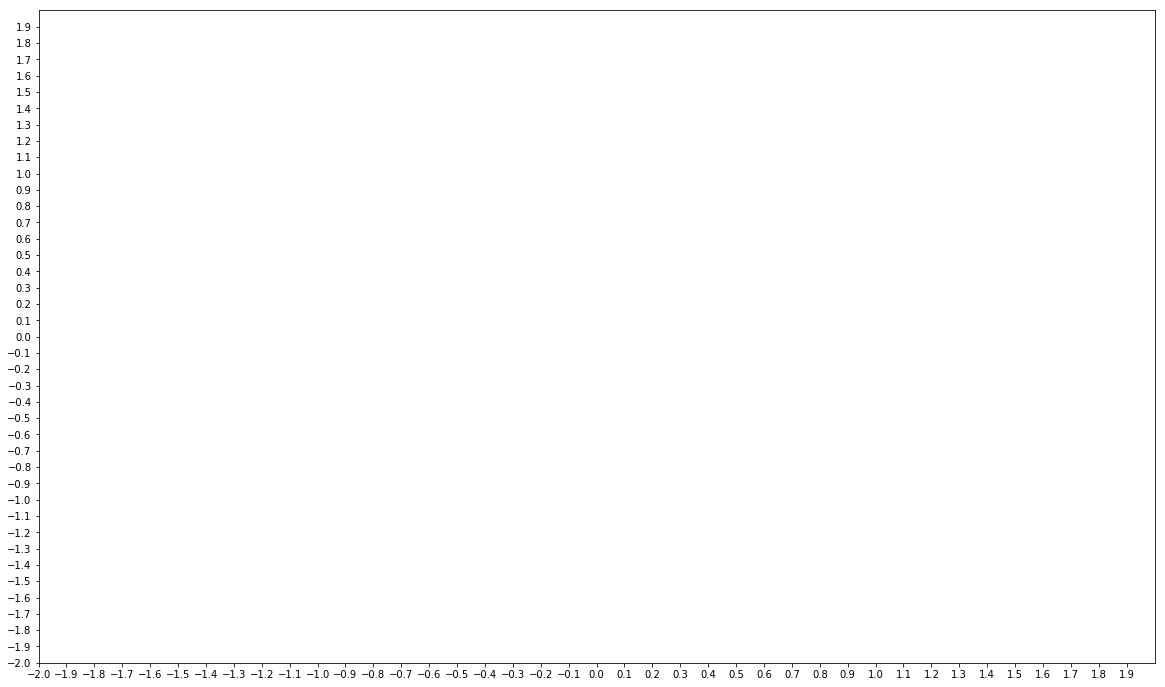

In [34]:
plot(object_data, 0 , 100)